<a href="https://colab.research.google.com/github/HassanYousef1985/Convolutions-for-Text-Classification-with-Keras/blob/master/Abschluss_Toxic_Comments_Classification_using_1D_CNN_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1: Installing and Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import re
import string
from pandas import DataFrame
from collections import Counter
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from sklearn.model_selection import train_test_split
print(tf.__version__)

2.5.0


## Task 2: Importing - Preprocessing and Exploring the Dataset 

In [2]:
# Load collected data from the webpage
train_df1= pd.read_csv('Tweetsofmyself1.csv', encoding='cp1252').fillna(' ')
# show full text of each tweet and all rows in the specified range
pd.set_option('display.max_rows', train_df1.shape[0]+1)
pd.set_option('display.max_colwidth', None)
# rename the labels
train_df1['check-worthy'] = train_df1['check-worthy'].replace(['yes'],1)
train_df1['check-worthy'] = train_df1['check-worthy'].replace(['no'],0)
# remove unused colomn 
train_df1 = train_df1.drop('claim',axis=1)
# remove hyberlinks
train_df1['tweet'] = train_df1['tweet'].str.replace('https:\/\/.*', '', flags=re.UNICODE)
# remove the word <link>
train_df1['tweet'] = train_df1['tweet'].str.replace('<link>', '', flags=re.UNICODE)
# remove emogis
train_df1['tweet'] = train_df1['tweet'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
# convert to lowercase
train_df1['tweet'] = train_df1['tweet'].str.lower() 
# remove punctaution .we do not need to remove punctuation because the fie glove.6B.100d contains punctuation

# show some items
train_df1.head(5)
# train_df.sample(10,random_state=1)

,tweet,check-worthy
0,"the wh, apparently, is somehow thinking that being anti-mask red meat to the stupidest part of their base is more of a political advantage than stopping the pandemic.",1
1,"michelle and i hope that the president, first lady, and all those affected by the coronavirus around the country are getting the care they need and are on the path to a speedy recovery.",0
2,"just realized that mcconnells covid relief bill includes 100% tax-deductibility of business meals, and if there were one thing i thought we could all agree on in the midst of a pandemic, its that we shouldnt be subsidizing people to eat indoors with others.",1
3,"in the next few weeks, i invite you to tackle together the pressing questions that the pandemic has brought to the fore, social ills above all. and we will do it in the light of the gospel, of the theological virtues and of the principles of the churchs social doctrine.",0
4,joe biden is stumbling over his words right now because he cant answer the moderators question about whether he wants more strict lockdowns. l-l-look. slow up more social distancing,1


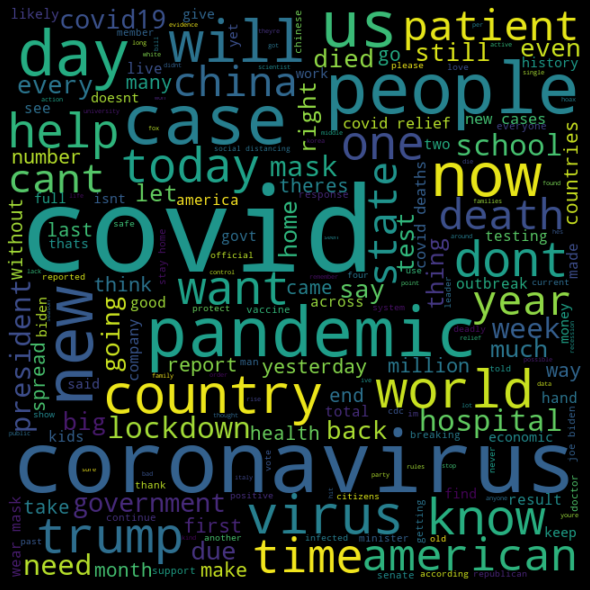

In [3]:
# plot to see some frequently words in train_df1 where check-worthy=1
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
comments = train_df1['tweet'].loc[train_df1['check-worthy']==1].values
wordcloud = WordCloud(
      width = 640,
      height = 640,
      background_color = 'black',
      stopwords = STOPWORDS).generate(str(comments))
fig = plt.figure(
      figsize = (12, 8),
      facecolor = 'k',
      edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [4]:
# Load data from another websites
train_df2= pd.read_csv('train3.csv', encoding="utf8").fillna(' ')
# remove hyberlinks
train_df2['tweet'] = train_df2['tweet'].str.replace('https:\/\/.*', '', flags=re.UNICODE)
# remove the word <link>
train_df2['tweet'] = train_df2['tweet'].str.replace('<link>', '', flags=re.UNICODE)
# remove emogis
train_df2['tweet'] = train_df2['tweet'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
# remove hashtags with names
hash_lists = []
lines =train_df2['tweet'].values.tolist()
for line in lines:
 new_line = re.sub("#[A-Za-z0-9_]+","", line)
 hash_lists.append(new_line)
train_df2['tweet'] = DataFrame (hash_lists,columns=['tweet'])
# convert to lowercase
train_df2['tweet'] = train_df2['tweet'].str.lower() 
# remove @ from the dataframe. we do not need to remove @ because the fie glove.6B.100d contains @
# train_df2['tweet'] = train_df2['tweet'].str.replace('@', '', flags=re.UNICODE)

# remove punctaution. we do not need to remove punctuation because the fie glove.6B.100d contains punctuation
# train_df2['tweet'] = train_df2['tweet'].str.replace('[^\w\s]','')


# delete unused colomn 
train_df2 = train_df2.drop('check-worthy1',axis=1)

train_df2.head(5)


,tweet,check-worthy
0,"since this will never get reported by the media, i wanted to share a copy of this check. @realdonaldtrump is once again donating his salary back to the united states government this quarter, it will be donated to @hhsgov to confront, contain, and combat coronavirus.",1
1,"thanks, . heres a handy little unintentional demo on the way to spread coronavirus by the most clueless person in america: touch community food as much as you can with your saliva-soaked fingers.",0
2,"folks, when you say the corona virus isnt a big deal, it only kills the disabled, elderly, chornically-ill, and immunocompromised, the implication is that those people are expendable. please be more careful.",0
3,just 1 case of corona virus in india and people are crazy for masks daily 400 people die in road crashes still no craze for helmetsthinking face safetysaves be it virus or road crashes,0
4,"president @realdonaldtrump made a commitment to donate his salary while in office. honoring that promise and to further protect the american people, he is donating his 2019 q4 salary to @hhsgov to support the efforts being undertaken to confront, contain, and combat coronavirus.",1


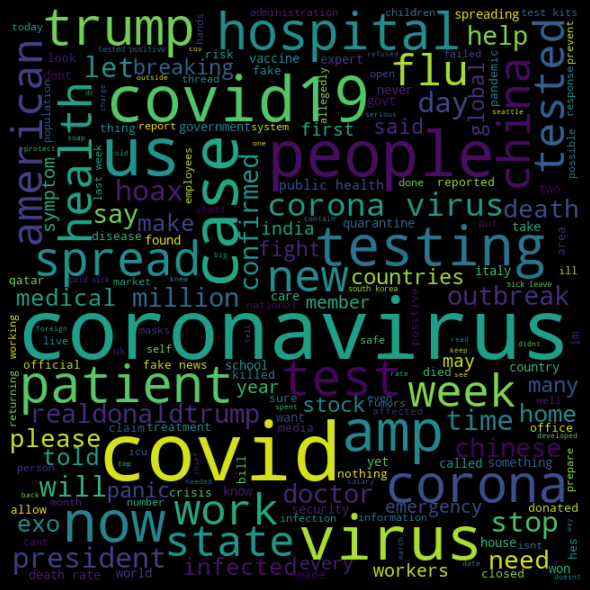

In [5]:
# plot to see some frequently words in train_df2 where check-worthy=1
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
comments = train_df2['tweet'].loc[train_df2['check-worthy']==1].values
wordcloud = WordCloud(
      width = 640,
      height = 640,
      background_color = 'black',
      stopwords = STOPWORDS).generate(str(comments))
fig = plt.figure(
      figsize = (12, 8),
      facecolor = 'k',
      edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [6]:
# merge all datasets that we have
train_df = pd.concat([train_df1, train_df2])
# show full text of each tweet and all rows in the specified range
pd.set_option('display.max_rows', train_df.shape[0]+1)
pd.set_option('display.max_colwidth', None)
# remove numbers from dataframe colomn train_df['tweet']
train_df['tweet'] = train_df['tweet'].str.replace('\d+', '')
train_df.head(5)


,tweet,check-worthy
0,"the wh, apparently, is somehow thinking that being anti-mask red meat to the stupidest part of their base is more of a political advantage than stopping the pandemic.",1
1,"michelle and i hope that the president, first lady, and all those affected by the coronavirus around the country are getting the care they need and are on the path to a speedy recovery.",0
2,"just realized that mcconnells covid relief bill includes % tax-deductibility of business meals, and if there were one thing i thought we could all agree on in the midst of a pandemic, its that we shouldnt be subsidizing people to eat indoors with others.",1
3,"in the next few weeks, i invite you to tackle together the pressing questions that the pandemic has brought to the fore, social ills above all. and we will do it in the light of the gospel, of the theological virtues and of the principles of the churchs social doctrine.",0
4,joe biden is stumbling over his words right now because he cant answer the moderators question about whether he wants more strict lockdowns. l-l-look. slow up more social distancing,1


In [7]:
# size of train_df
train_df.shape

(1207, 2)

In [8]:
X=train_df['tweet'].values
print(X)

['the wh, apparently, is somehow thinking that being anti-mask red meat to the stupidest part of their base is more of a political advantage than stopping the pandemic.'
 'michelle and i hope that the president, first lady, and all those affected by the coronavirus around the country are getting the care they need and are on the path to a speedy recovery.'
 'just realized that mcconnells covid relief bill includes % tax-deductibility of business meals, and if there were one thing i thought we could all agree on in the midst of a pandemic, its that we shouldnt be subsidizing people to eat indoors with others.'
 ...
 'rwanda confirms  new covid- cases bringing total to .  travellers from dubai.  travellers from kenya.  travellers from usa.  traveller from qatar.  traveller from india.  contact of a previous case. '
 'these are the world cup  workers quarantined in miserable conditions in qatar.. this is inhuman.. does @fifacom accept this crime @fifaworldcup @fifaworldcup_fr @easportsfif

In [9]:
# View few check-worthy comments
train_df.loc[train_df['check-worthy']==1].sample(10,random_state=10)

,tweet,check-worthy
172,"so all of the sudden covid cases are spiking. and its because we suddenly are not following the rules. all our fault. couldnt be because the rules really had no affect to begin with, and the virus is gonna spread anyway, because, well, its a virus. nah.",1
549,"if u love humanity, then pl stop forwarding any fake msg abt to avoid panic, when we already hv enough to fight wid . hanta virus spreads only from an infected animals urine,faeces or saliva. pl educate yourself amp rt for others to understand.",1
255,"billionaire wealth hits trillion largely thanks to government stimulus packages, while millions suffer financially due to covid.",1
427,"breaking: congress prepares to shutter capitol hill for coronavirus, opens telework center",1
143,"seen in kigali: to prevent the risk of coronavirus outbreak, passengers at the kigali bus park have to wash their hands before getting onto buses. rwanda has recorded no case of the epidemic but the country has stepped up vigilance.",1
309,"if democrats were the majority in the senate, covid relief would have happened months ago. everyone in food lines, being evicted, out of work and wondering how they will pay the electric bill or feed their kids this winter can thank mitch mcconnell and the republican party.",1
470,"according to our world in data, mexico is only doing . tests now for every confirmed covid case it has -- the lowest in world and down from about in early april. that suggests a serious lack of testing.",1
440,he told wealthy friends. then cashed out a cool .m in stock. then voted against the covid- relief bill. he needs to go,1
149,"my friend is a respiratory nurse in a us urban hospital. a woman, recently returned from italy, came in with all the symptoms of covid. in order to test her, the doctors needed approval from the government. the feds turned down their request. she was sent home.",1
298,americans are dying and mitch mcconnell is forcing the senate to confirm judges. we need to pass covid relief now.,1


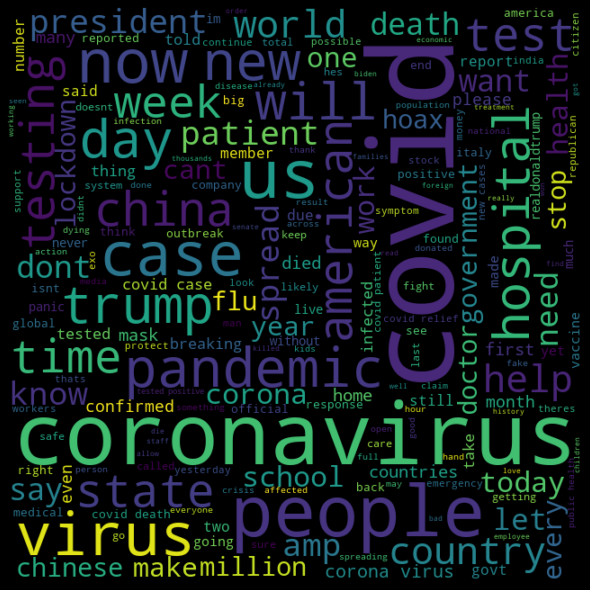

In [10]:
  # plot to see some frequently words where check-worthy =1
  from wordcloud import WordCloud, STOPWORDS
  import matplotlib.pyplot as plt
  comments = train_df['tweet'].loc[train_df['check-worthy']==1].values
  wordcloud = WordCloud(
      width = 640,
      height = 640,
      background_color = 'black',
      stopwords = STOPWORDS).generate(str(comments))
  fig = plt.figure(
      figsize = (12, 8),
      facecolor = 'k',
      edgecolor = 'k')
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

In [11]:
# see some other values
y=train_df['check-worthy'].values
print(y)

[1 0 1 ... 0 1 1]


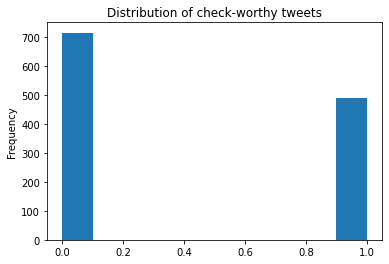

In [12]:
#Plot frequency of toxic comments
train_df['check-worthy'].plot(kind='hist',title='Distribution of check-worthy tweets')

In [13]:
# number of check-worthy and not check-worthy twees
train_df['check-worthy'].value_counts()

0    716
1    491
Name: check-worthy, dtype: int64

**Task 3: Data Prep- Tokenize and Pad Text Data**

In [14]:
# Find length of longest string in dataframe column 'tweet'
train_df['tweet'].str.len().max()

321

In [15]:
#  list of all unique words in the dataframe
list(train_df['tweet'].str.split(' ', expand=True).stack().unique())

['the',
 'wh,',
 'apparently,',
 'is',
 'somehow',
 'thinking',
 'that',
 'being',
 'anti-mask',
 'red',
 'meat',
 'to',
 'stupidest',
 'part',
 'of',
 'their',
 'base',
 'more',
 'a',
 'political',
 'advantage',
 'than',
 'stopping',
 'pandemic.',
 'michelle',
 'and',
 'i',
 'hope',
 'president,',
 'first',
 'lady,',
 'all',
 'those',
 'affected',
 'by',
 'coronavirus',
 'around',
 'country',
 'are',
 'getting',
 'care',
 'they',
 'need',
 'on',
 'path',
 'speedy',
 'recovery.',
 'just',
 'realized',
 'mcconnells',
 'covid',
 'relief',
 'bill',
 'includes',
 '%',
 'tax-deductibility',
 'business',
 'meals,',
 'if',
 'there',
 'were',
 'one',
 'thing',
 'thought',
 'we',
 'could',
 'agree',
 'in',
 'midst',
 'pandemic,',
 'its',
 'shouldnt',
 'be',
 'subsidizing',
 'people',
 'eat',
 'indoors',
 'with',
 'others.',
 'next',
 'few',
 'weeks,',
 'invite',
 'you',
 'tackle',
 'together',
 'pressing',
 'questions',
 'pandemic',
 'has',
 'brought',
 'fore,',
 'social',
 'ills',
 'above',
 '

In [16]:
# number of all unique words in the dataframe
len(Counter(" ".join(train_df['tweet'].str.lower().values.tolist()).split(" ")).items())

8112

In [17]:
max_features = 9000
max_text_length=400

In [18]:
x_tokenizer=text.Tokenizer(max_features)
x_tokenizer.fit_on_texts(list(X))
x_tokenized=x_tokenizer.texts_to_sequences(X)
x_train_val=sequence.pad_sequences(x_tokenized,maxlen=max_text_length)

Task 4: Prepare Embedding Matrix with Pre-trained GloVe Embeddings

In [19]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip -q glove.6B.zip

In [20]:
# The archive contains text-encoded vectors of various sizes: 50-dimensional,
#  100-dimensional. We'll use the 100D ones.

# Let's make a dict mapping words (strings) to their NumPy vector representation
embedding_dims = 100
hits = 0
misses = 0
embeddings_index = dict()
f = open('glove.6B.100d.txt')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print(f'Found{len(embeddings_index)}word vectors.')

# Now, let's prepare a corresponding embedding matrix that we can use in a Keras Embedding layer.
# It's a simple NumPy matrix where entry at index i is the pre-trained vector for the word of index i in our vectorizer's vocabulary.
embedding_matrix = np.zeros((max_features, embedding_dims))
for word, index in x_tokenizer.word_index.items():
  if index > max_features -1:
    break
  else:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector
      hits += 1
    else:
      misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Found6119word vectors.
Converted 3100 words (3251 misses)


In [21]:
# print dictionary items
x_tokenizer.word_index.items()

dict_items([('the', 1), ('to', 2), ('a', 3), ('of', 4), ('and', 5), ('in', 6), ('is', 7), ('covid', 8), ('for', 9), ('this', 10), ('that', 11), ('on', 12), ('i', 13), ('are', 14), ('we', 15), ('coronavirus', 16), ('you', 17), ('have', 18), ('with', 19), ('it', 20), ('not', 21), ('be', 22), ('from', 23), ('has', 24), ('people', 25), ('virus', 26), ('all', 27), ('as', 28), ('at', 29), ('they', 30), ('who', 31), ('but', 32), ('corona', 33), ('my', 34), ('if', 35), ('its', 36), ('about', 37), ('just', 38), ('so', 39), ('us', 40), ('was', 41), ('by', 42), ('will', 43), ('now', 44), ('can', 45), ('cases', 46), ('pandemic', 47), ('he', 48), ('their', 49), ('our', 50), ('out', 51), ('an', 52), ('no', 53), ('or', 54), ('what', 55), ('new', 56), ('how', 57), ('been', 58), ('more', 59), ('up', 60), ('would', 61), ('like', 62), ('when', 63), ('your', 64), ('there', 65), ('were', 66), ('do', 67), ('because', 68), ('one', 69), ('health', 70), ('get', 71), ('over', 72), ('his', 73), ('me', 74), ('tim

In [22]:
# print embedding_matrix and ots shape
print(embedding_matrix)
embedding_matrix.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(9000, 100)

Task 5: Create the Embedding Layer

In [23]:
model = Sequential()
# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
# (we don't want to update them during training).
model.add(Embedding(max_features,
                    embedding_dims,
                    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                    trainable=False))
model.add(Dropout(0.2))

Task 6: Build the model

In [24]:
#  there are hyper parameters
# filter is how many output channels this convolution layer has
filters = 250
kernel_size = 3
hidden_dims = 250

In [25]:
# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(filters,
                 5,
                 padding='valid',
                 activation='relu'))
# we use max pooling:
model.add(GlobalMaxPooling1D())
# We add a vanilla hidden layer:
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dropout(0.2))

# We project has only one output so we set the activation to sigmoid:
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         900000    
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 250)         75250     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 250)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 250)         312750    
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               6

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Task 7: Train the model

In [27]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y, test_size=0.15, random_state=1)

In [28]:
batch_size = 32
epochs = 10

In [29]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_val, y_val))

Epoch 1/10
33/33 [==============================] - 10s 283ms/step - loss: 0.7054 - accuracy: 0.6010 - val_loss: 0.6530 - val_accuracy: 0.5714
Epoch 2/10
33/33 [==============================] - 9s 270ms/step - loss: 0.6244 - accuracy: 0.6546 - val_loss: 0.5960 - val_accuracy: 0.7033
Epoch 3/10
33/33 [==============================] - 9s 278ms/step - loss: 0.5864 - accuracy: 0.6878 - val_loss: 0.5676 - val_accuracy: 0.6923
Epoch 4/10
33/33 [==============================] - 9s 280ms/step - loss: 0.5271 - accuracy: 0.7210 - val_loss: 0.5350 - val_accuracy: 0.7198
Epoch 5/10
33/33 [==============================] - 9s 278ms/step - loss: 0.4883 - accuracy: 0.7698 - val_loss: 0.5877 - val_accuracy: 0.6978
Epoch 6/10
33/33 [==============================] - 9s 278ms/step - loss: 0.4592 - accuracy: 0.7824 - val_loss: 0.5533 - val_accuracy: 0.7363
Epoch 7/10
33/33 [==============================] - 9s 276ms/step - loss: 0.4485 - accuracy: 0.7698 - val_loss: 0.5901 - val_accuracy: 0.6978
Epoch

Task 8: Evaluate Model

In [30]:
test_df = pd.read_csv('test.csv')

In [31]:
x_test = test_df['tweet'].values

In [32]:
# remove hyberlinks
test_df['tweet'] = test_df['tweet'].str.replace('https:\/\/.*', '', flags=re.UNICODE)
# remove the word <link>
test_df['tweet'] = test_df['tweet'].str.replace('<link>', '', flags=re.UNICODE)
# remove emogis
test_df['tweet'] = test_df['tweet'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
# convert to lowercase
test_df['tweet'] = test_df['tweet'].str.lower() 

In [33]:
x_test_tokenized = x_tokenizer.texts_to_sequences(x_test)
x_testing = sequence.pad_sequences(x_test_tokenized, maxlen=max_text_length)

In [34]:
y_testing = model.predict(x_testing, verbose = 1, batch_size=32)

3/3 [==============================] - 0s 62ms/step


In [35]:
y_testing.shape

(72, 1)

In [36]:
y_testing[0]

array([0.04402152], dtype=float32)

In [37]:
test_df['check-worthy'] = ['not worthy' if x < .5 else 'worthy' for x in y_testing]
test_df[['tweet', 'check-worthy']].head(500)

,tweet,check-worthy
0,"as we saw over the wkend, disinfo is being spread online about a supposed national lockdown and grounding flights. be skeptical of rumors. make sure youre getting info from legitimate sources. the @whitehouse is holding daily briefings and @cdcgov is providing the latest.",not worthy
1,".@realdonaldtrump, dear lordplease step up and be a leader. while you have been yammering about hoaxes and fake news, the covid-19 pandemic has hit all over america. @govpritzker and others have filled this countrys leadership gap. lead or get out of their way.",not worthy
2,"sorry, there is no coming back from saying this was all a hoax. i dont give a fuck about change of tone, change of heart, nothing. you mutha fuckers took a serious situation and endangered all just to defend a bigot. fuck you. not sorry. #coronavirus",not worthy
3,delhi police has registered a case under section 509 of the indian penal code against a man who allegedly spat on a woman belonging to manipur and called her corona in vijay nagar area of north delhi last night.,not worthy
4,"fake news peddler dhruv rathee had said: corona virus wont spread outside china, we need not worry has this guy ever spoke something sensible",worthy
5,this photo circulating about a case of #covid19 in kano allegedly reported by @bbcworld is false this image has been doctored to spread fear and panic details on confirmed cases can be found via,worthy
6,"sen. rand paul, the guy who opposed the #coronavirus relief bill and paid sick leave, tested positive on march 22 and is on paid sick leave his father, and former congressman, ron paul, published an essay titled the coronavirus hoax on march 17. hypocrisy infects from the root",worthy
7,"never forget.. when india was fighting corona, pigs like @vinodkapri were sharing fake news to create panic for congress propaganda. theres no shortage of ppes. assam medical college students were testing ppes as what can be used if shortage occurs.",worthy
8,"fox news put their viewers at risk by making them believe the covid-19 pandemic was a hoax. those viewers then put the entire us population at risk, and many people have lost their lives. fox news should face a class action lawsuit to hold them responsible. #foxclassaction",not worthy
9,this isnt a conspiracy tweet but i really think covid-19 has been here in america for awhile. do you guys remember how sick everyone was during the holidays/early january and how everyone was saying they had the flu and the flu shot didnt work,worthy
